In [102]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [103]:
data= pd.read_csv('.\data1.csv')

In [104]:
data.head()

,0.02,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.018,0.0084,0.009,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


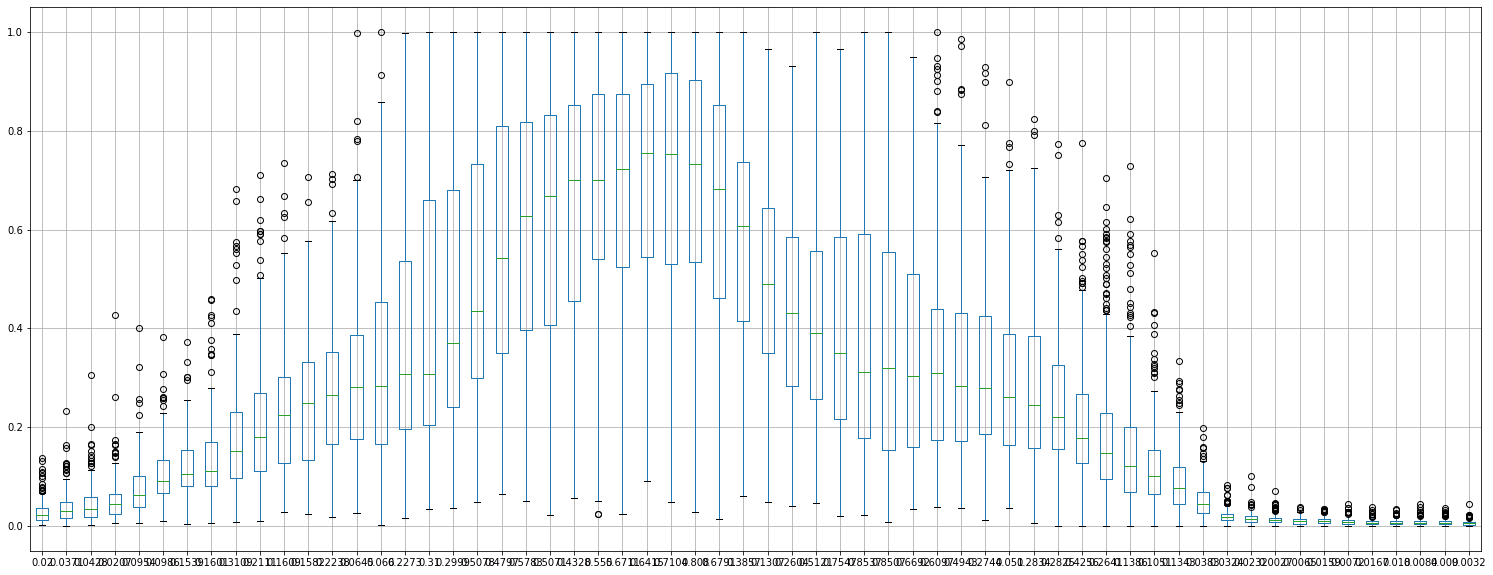

In [58]:
plt.figure(figsize=(26,10))
data.boxplot()

In [5]:
drops= ['0.02','0.0371','0.0428','0.0207','0.2641','0.1386','0.1051']
data= data.drop(drops, axis=1)

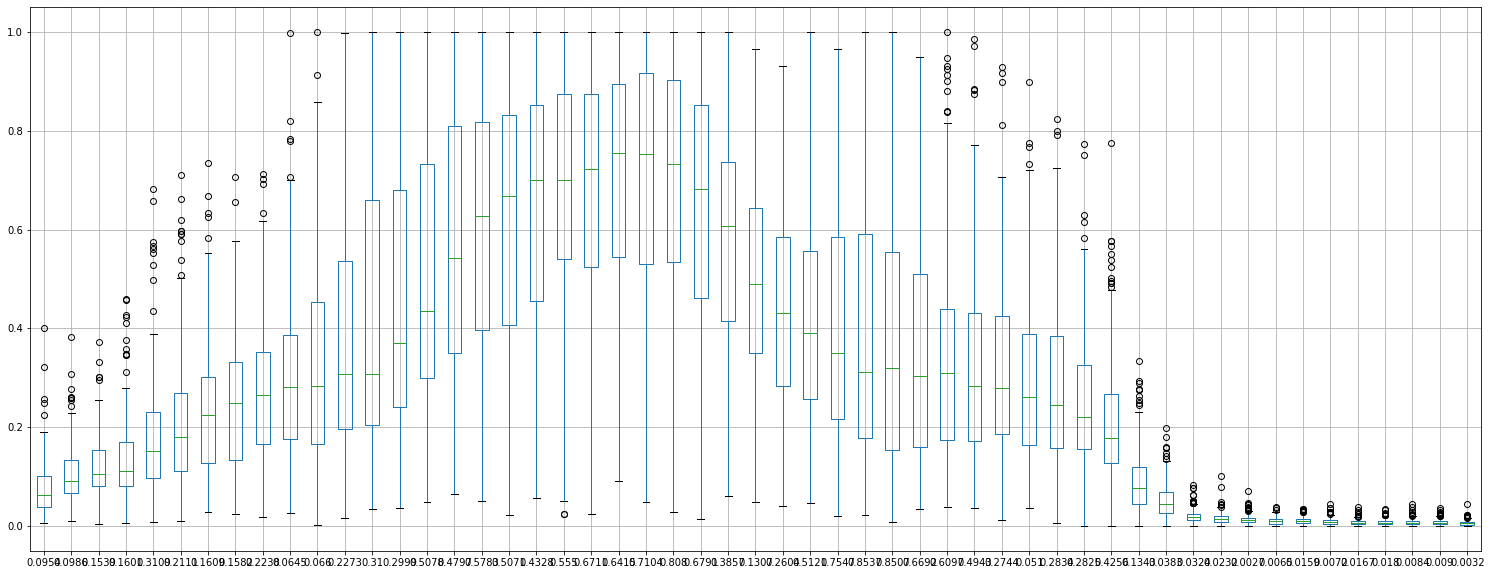

In [6]:
plt.figure(figsize=(26,10))
data.boxplot()

In [105]:
#converting the object to str
data['R'].replace(['R','M'],[0,1],inplace=True)

In [118]:
from sklearn.model_selection import train_test_split

y=data.iloc[:,53]
x=data.drop(data.columns[[53]],axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = 1/3, random_state = 0)

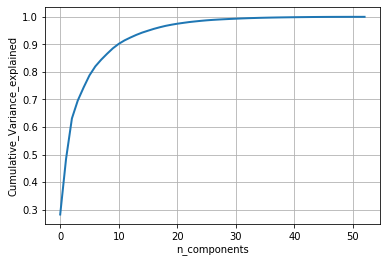

In [119]:
from sklearn.decomposition import PCA
pca=PCA()  
pca.n_components=53 
pca_data= pca.fit_transform(x_train)
percentage_var_explained = pca.explained_variance_ratio_;  
cum_var_explained=np.cumsum(percentage_var_explained)
#Plot PCA spectrum   
plt.figure(1,figsize=(6,4))
plt.clf()  
plt.plot(cum_var_explained,linewidth=2)  
plt.axis('tight')  
plt.grid() 
plt.xlabel('n_components') 
plt.ylabel('Cumulative_Variance_explained')  
plt.show()

In [120]:
pca=PCA(.90)  
pca.fit(x_train)  
print('Number of components to explain 90% Variance is',pca.n_components_)

Number of components to explain 90% Variance is 11


In [121]:
pca=PCA(n_components=2) 
pca_data_vis=pca.fit_transform(x_train) 
print('shape of PCA data',pca_data_vis.shape)

shape of PCA data (138, 2)


In [128]:
pca_data_vis = np.vstack((pca_data_vis.T,y_train)).T
pca_vis_df = pd.DataFrame(data=pca_data_vis,columns=("1st_principal","2nd_principal","label"))  
sns.FacetGrid(pca_vis_df,hue="label",size=6).map(plt.scatter,'1st_principal','2nd_principal')
plt.show()

ValueError: Shape of passed values is (138, 4), indices imply (138, 3)

In [129]:
pca=PCA(.90) 
pca.fit(x_train) 
x_train=pca.transform(x_train) 
x_test=pca.transform(x_test)

In [130]:
from sklearn.neighbors import KNeighborsClassifier

knn= KNeighborsClassifier(n_neighbors = 7)
knn.fit(x_train,y_train)

y_pred= knn.predict(x_test)

ValueError: Unknown label type: 'continuous'

In [ ]:
from sklearn.metrics import accuracy_score

#accuracy score
print(accuracy_score(y_test, y_pred))

In [125]:
from sklearn.linear_model  import LogisticRegression  
LogReg=LogisticRegression(class_weight='balanced')  
LogReg.fit(x_train,y_train)
y_pred=LogReg.predict(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: Unknown label type: 'continuous'

In [70]:
#accuracy score
print(accuracy_score(y_test, y_pred))

0.7391304347826086


In [117]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

ValueError: Unknown label type: 'continuous'

In [73]:
#accuracy score
print(accuracy_score(y_test, y_pred))

0.6956521739130435


In [127]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

log_clf = LogisticRegression(solver="liblinear", random_state=0)
rnd_clf = RandomForestClassifier(n_estimators=5, random_state=0, max_leaf_nodes=8)

gnb_clf = GaussianNB()

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf),  ('gnb', gnb_clf)],
    voting='hard')

voting_clf.fit(x_train, y_train)

for clf in (log_clf, rnd_clf, svm_clf, gnb_clf, voting_clf):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


ValueError: Unknown label type: 'continuous'

In [99]:
#accuracy score
print(accuracy_score(y_test, y_pred))

0.6956521739130435
